In [3]:
import pandas as pd

excel_file_path = r"d:\Users\A.Fallah\Desktop\Price Estimation Model\Last Round\Tehran_Estimation_house.csv"
df_all = pd.read_csv(excel_file_path)
df_all

,postal_code,index,unit_per_floor,neighborhood,floors_count,area,Tours,ID,District,Neighborhood,weighted_average_price,y_pred,estimated_price_m2,estimated_price
0,1676894473,4299131,1,نیروی دریایی,3,92,16768,6147,4,نیروی دریایی,85368038,17.998423,65556476.0,6.031196e+09
1,1948635519,475903,2,حسینیه ارشاد-قبا,7,120,19486,6698,3,حسینیه ارشاد-قبا,106383318,18.555834,114471190.0,1.373654e+10
2,1956986973,2626362,1,شهرک نفت (البرز),2,131,19569,6723,1,شهرک نفت (البرز),118834187,19.142672,205852720.0,2.696671e+10
3,1631819933,3940647,1,دبستان,2,59,16318,6004,7,دبستان,89627463,18.273530,86316300.0,5.092662e+09
4,1947717911,472698,1,حسینیه ارشاد-قبا,5,135,19477,6695,3,حسینیه ارشاد-قبا,106383318,18.405690,98512024.0,1.329912e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505559,1887944694,328432,1,شهید بهشتی,2,54,18879,6587,20,شهید بهشتی,41196543,17.535920,41281260.0,2.229188e+09
505560,1857856813,267488,1,شهادت,5,99,18578,6532,20,شهادت,45362112,17.684032,47871572.0,4.739286e+09
505561,1857977389,271605,1,شهادت,5,68,18579,6533,20,شهادت,45362112,17.609823,44447676.0,3.022442e+09
505562,1847676157,4593409,3,دیلمان,2,65,18476,6498,20,دیلمان,42662727,17.559252,42255784.0,2.746626e+09


In [5]:
import pandas as pd

excel_file_path = r"d:\Users\A.Fallah\Desktop\Price Estimation Model\Last Round\Customers_in_Tehran_New.csv"
df_customers = pd.read_csv(excel_file_path)
df_customers = df_customers.rename(columns={'homePostalCode': 'postal_code'})
df_customers

,Unnamed: 0,customerkey,postal_code
0,1,2,1676894473
1,3,4,1948635519
2,4,5,1956986973
3,20,21,1631819933
4,27,28,1947717911
...,...,...,...
903476,11794325,19931245,1857856813
903477,11794425,19931345,1857977389
903478,11794837,19931757,1847676157
903479,11795129,19932049,1818160013


In [6]:
df = pd.merge(df_customers, df_all, on='postal_code', how='left')
df = df.drop_duplicates(['customerkey'])
df = df.dropna()
df


,Unnamed: 0,customerkey,postal_code,index,unit_per_floor,neighborhood,floors_count,area,Tours,ID,District,Neighborhood,weighted_average_price,y_pred,estimated_price_m2,estimated_price
0,1,2,1676894473,4299131.0,1.0,نیروی دریایی,3.0,92.0,16768.0,6147.0,4.0,نیروی دریایی,85368038.0,17.998423,65556476.0,6.031196e+09
1,3,4,1948635519,475903.0,2.0,حسینیه ارشاد-قبا,7.0,120.0,19486.0,6698.0,3.0,حسینیه ارشاد-قبا,106383318.0,18.555834,114471190.0,1.373654e+10
2,4,5,1956986973,2626362.0,1.0,شهرک نفت (البرز),2.0,131.0,19569.0,6723.0,1.0,شهرک نفت (البرز),118834187.0,19.142672,205852720.0,2.696671e+10
3,20,21,1631819933,3940647.0,1.0,دبستان,2.0,59.0,16318.0,6004.0,7.0,دبستان,89627463.0,18.273530,86316300.0,5.092662e+09
4,27,28,1947717911,472698.0,1.0,حسینیه ارشاد-قبا,5.0,135.0,19477.0,6695.0,3.0,حسینیه ارشاد-قبا,106383318.0,18.405690,98512024.0,1.329912e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903474,11794055,19930975,1887944694,328432.0,1.0,شهید بهشتی,2.0,54.0,18879.0,6587.0,20.0,شهید بهشتی,41196543.0,17.535920,41281260.0,2.229188e+09
903476,11794325,19931245,1857856813,267488.0,1.0,شهادت,5.0,99.0,18578.0,6532.0,20.0,شهادت,45362112.0,17.684032,47871572.0,4.739286e+09
903477,11794425,19931345,1857977389,271605.0,1.0,شهادت,5.0,68.0,18579.0,6533.0,20.0,شهادت,45362112.0,17.609823,44447676.0,3.022442e+09
903478,11794837,19931757,1847676157,4593409.0,3.0,دیلمان,2.0,65.0,18476.0,6498.0,20.0,دیلمان,42662727.0,17.559252,42255784.0,2.746626e+09


In [7]:
df.to_csv(r"d:\Users\A.Fallah\Desktop\Price Estimation Model\Last Round\Tehran_Estimation_Customers.csv",  index=False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


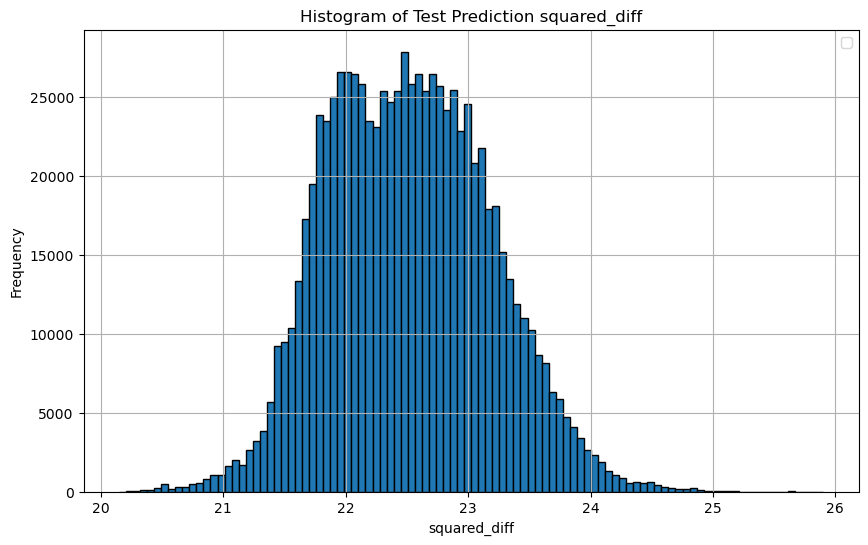

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
# Plot histogram of correlations
plt.hist(np.log(df['estimated_price']), bins=100, edgecolor='black')
plt.xlabel('squared_diff')
plt.ylabel('Frequency')
plt.title('Histogram of Test Prediction squared_diff')
plt.legend()
plt.grid(True)
plt.show()